In [56]:
import openpyxl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
#setting to make numbers easier to read on display 
pd.options.display.float_format='{:20.2f}'.format

pd.set_option('display.max_columns',999)


In [57]:
df=pd.read_excel("./data/online_retail_II.xlsx",sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [59]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [60]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [61]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [62]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [63]:
df["Invoice"]=df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [64]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [65]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [66]:
df["StockCode"]=df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [67]:
df[df["StockCode"].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


HERE AFTER SEEING ALL THEUNIQUE VALUES OF STOCKCODE ONLY STOCKCODE THAT CONATINS PAD IS BEING INCLUDED FOR THE CLUSTERING EVERYTHING ELSE WILL BE REMMOVED 

DATA CLEANING

In [68]:
cleaned_df=df.copy()

In [69]:
cleaned_df["Invoice"]=cleaned_df["Invoice"].astype("str")

mask=(
    cleaned_df["Invoice"].str.match("^\\d{6}$")==True
)
cleaned_df=cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [70]:
cleaned_df["StockCode"]=cleaned_df["StockCode"].astype("str")

mask=(
    (cleaned_df["StockCode"].str.match("^\\d{5}$")==True)
    | (cleaned_df["StockCode"].str.match("^\\{5}[a-zA-Z]+$")==True)
    | (cleaned_df["StockCode"].str.match("^PADS$")==True)

)
cleaned_df=cleaned_df[mask]


In [71]:
cleaned_df.dropna(subset=["Customer ID"],inplace=True)

C:\Users\manas\AppData\Local\Temp\ipykernel_8148\3042227786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"],inplace=True)


In [72]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350943.00,350943,350943.00,350943.00
mean,13.70,2010-07-05 17:09:34.748549120,2.98,15360.24
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.07,NaN,4.42,1678.20


In [73]:
len(cleaned_df[cleaned_df["Price"]==0])

27

In [74]:
cleaned_df=cleaned_df[cleaned_df["Price"]>0.0]

In [75]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350916.00,350916,350916.00,350916.00
mean,13.70,2010-07-05 17:14:15.798311168,2.98,15360.35
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.08,NaN,4.42,1678.16


In [76]:
cleaned_df["Price"].min()

0.001

In [77]:
(len(cleaned_df)/len(df))*100

66.7825014606222

LOST AROUND 33 PERCENTAGE OF DATA

FEATURE ENGINEERING

In [78]:
cleaned_df["SalesLineTotal"]=cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [79]:
aggregated_df=cleaned_df.groupby(by="Customer ID" ,as_index=False)\
    .agg(
        MonetoryValue=("SalesLineTotal","sum"),
        Frequency=("Invoice","nunique"),
        LastInoviceDate=("InvoiceDate","max")
                )
aggregated_df.head(5)

,Customer ID,MonetoryValue,Frequency,LastInoviceDate
0,12346.00,144.02,2,2010-06-28 13:53:00
1,12347.00,966.87,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,1946.64,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [80]:
max_invoice_date=aggregated_df["LastInoviceDate"].max()

aggregated_df["Recency"]=(max_invoice_date-aggregated_df["LastInoviceDate"]).dt.days
aggregated_df.head(5)

,Customer ID,MonetoryValue,Frequency,LastInoviceDate,Recency
0,12346.00,144.02,2,2010-06-28 13:53:00,164
1,12347.00,966.87,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,1946.64,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


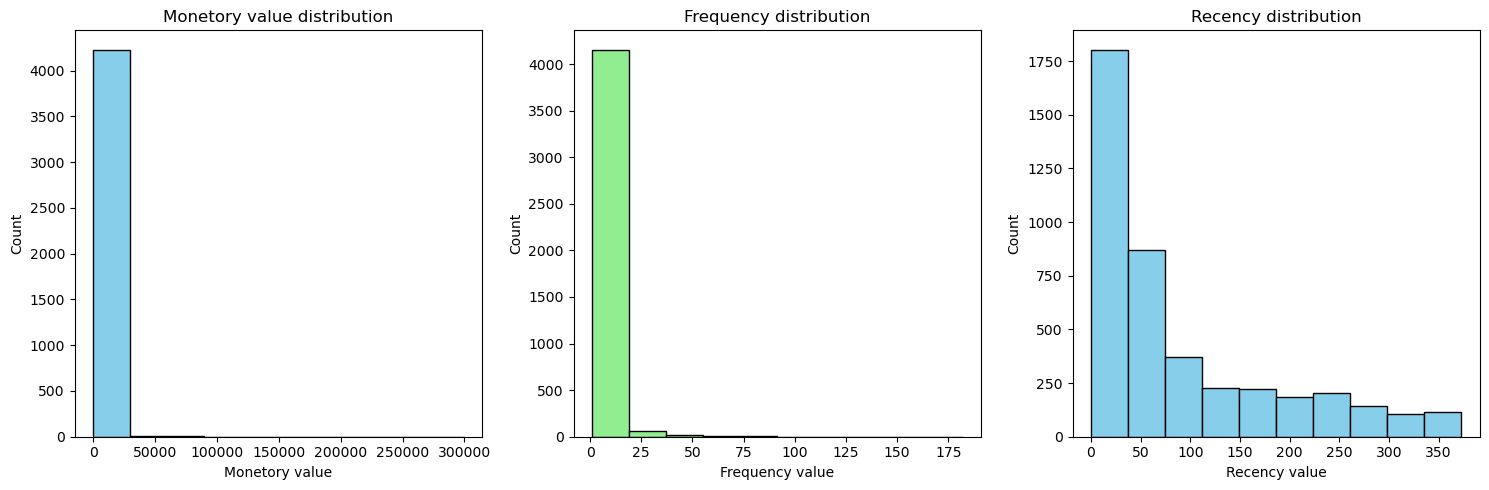

In [81]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetoryValue"],bins=10, color="skyblue", edgecolor="black")
plt.title("Monetory value distribution")
plt.xlabel("Monetory value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"],bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency distribution")
plt.xlabel("Frequency value")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"],bins=10, color="skyblue", edgecolor="black")
plt.title("Recency distribution")
plt.xlabel("Recency value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

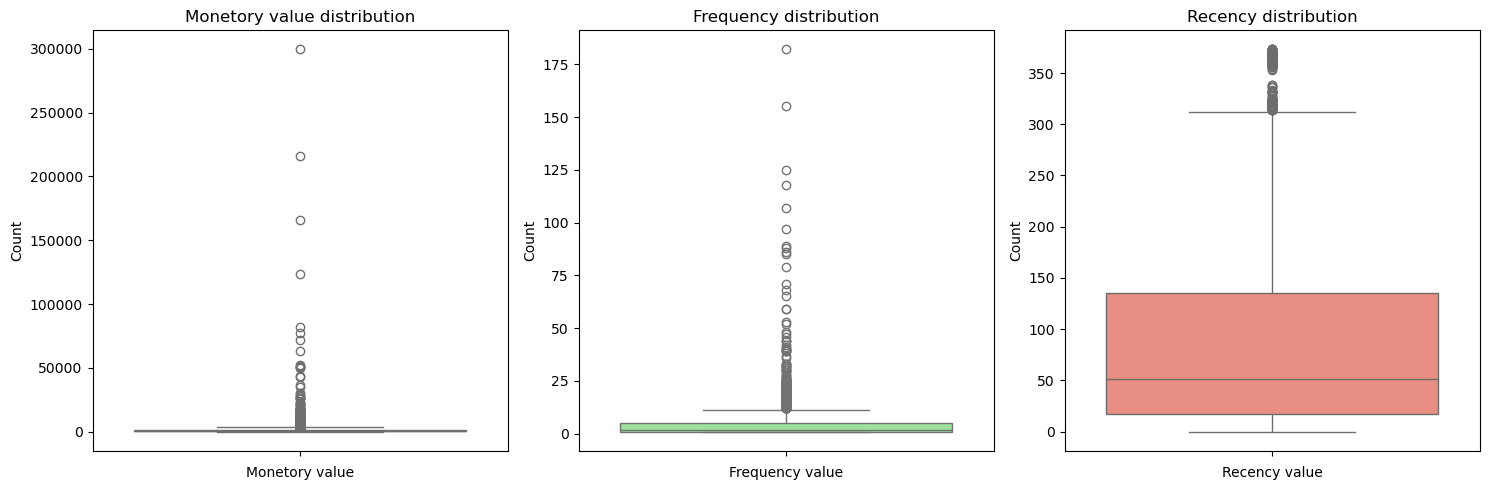

In [82]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df["MonetoryValue"] ,color="skyblue")
plt.title("Monetory value distribution")
plt.xlabel("Monetory value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(aggregated_df["Frequency"],color="lightgreen")
plt.title("Frequency distribution")
plt.xlabel("Frequency value")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(aggregated_df["Recency"],color="salmon")
plt.title("Recency distribution")
plt.xlabel("Recency value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [83]:
M_Q1=aggregated_df["MonetoryValue"].quantile(0.25)
M_Q3=aggregated_df["MonetoryValue"].quantile(0.75)
M_IQR=M_Q3-M_Q1

monetary_outliers_df=aggregated_df[(aggregated_df["MonetoryValue"]>(M_Q3+1.5*M_IQR))| (aggregated_df["MonetoryValue"]<(M_Q3-1.5*M_IQR))]
monetary_outliers_df.describe()

,Customer ID,MonetoryValue,Frequency,LastInoviceDate,Recency
count,412.00,412.00,412.00,412,412.00
mean,15083.30,10433.19,17.03,2010-11-10 21:01:28.106796032,28.67
min,12357.00,3308.90,1.00,2009-12-10 18:03:00,0.00
25%,13561.75,3957.30,8.00,2010-11-08 13:45:45,3.00
50%,14956.50,5389.85,12.00,2010-11-26 15:03:30,13.00
75%,16653.00,8847.18,18.00,2010-12-06 12:47:30,31.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,364.00
std,1733.82,22291.55,19.38,NaN,49.15


In [84]:
F_Q1=aggregated_df["Frequency"].quantile(0.25)
F_Q3=aggregated_df["Frequency"].quantile(0.75)
F_IQR=F_Q3-F_Q1

frequency_outliers_df=aggregated_df[(aggregated_df["Frequency"]>(F_Q3+1.5*F_IQR))| (aggregated_df["Frequency"]<(F_Q3-1.5*F_IQR))]
frequency_outliers_df.describe()

,Customer ID,MonetoryValue,Frequency,LastInoviceDate,Recency
count,269.00,269.00,269.00,269,269.00
mean,15392.80,12298.98,23.70,2010-11-23 16:23:39.033456896,15.87
min,12437.00,898.14,12.00,2010-05-12 16:51:00,0.00
25%,13831.00,3638.01,13.00,2010-11-21 10:38:00,2.00
50%,15527.00,5572.67,17.00,2010-12-02 12:09:00,7.00
75%,16883.00,10269.46,24.00,2010-12-07 12:43:00,18.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,211.00
std,1748.38,27198.75,21.58,NaN,26.79


In [85]:
non_outliers_df=aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetoryValue,Frequency,LastInoviceDate,Recency
count,3785.00,3785.00,3785.00,3785,3785.00
mean,15372.18,773.15,2.86,2010-09-03 14:28:03.788639232,96.95
min,12346.00,2.95,1.00,2009-12-01 12:55:00,0.00
25%,13909.00,236.40,1.00,2010-07-08 16:56:00,22.00
50%,15379.00,508.57,2.00,2010-10-12 17:17:00,58.00
75%,16847.00,1115.97,4.00,2010-11-17 13:42:00,154.00
max,18287.00,3298.60,11.00,2010-12-09 20:01:00,373.00
std,1691.82,714.34,2.23,NaN,98.12


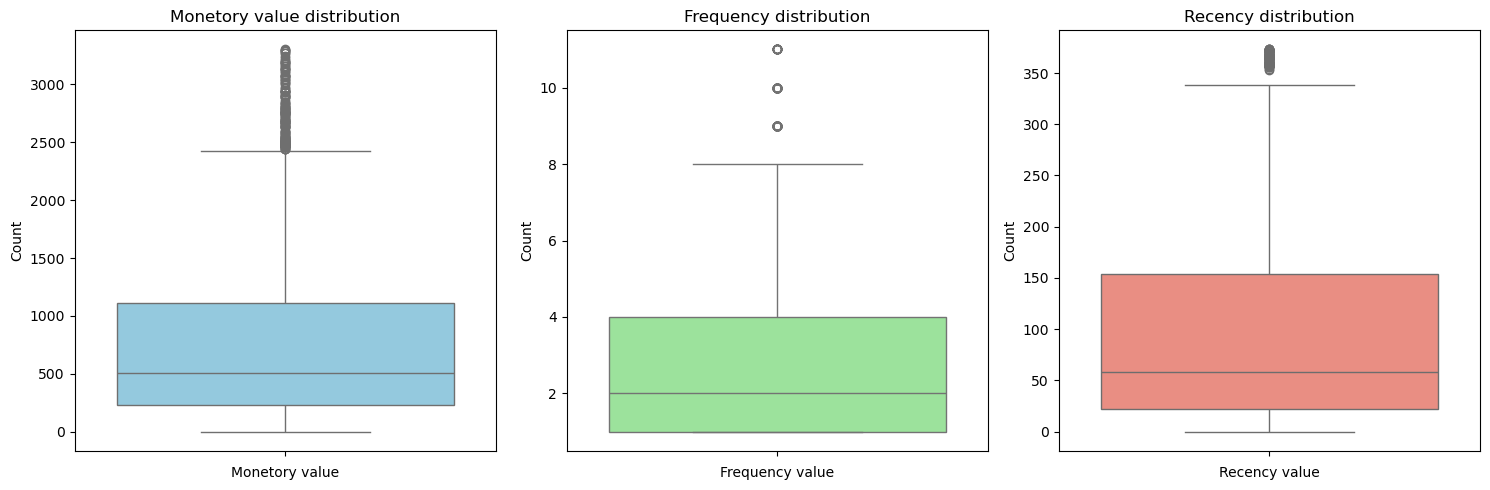

In [86]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df["MonetoryValue"] ,color="skyblue")
plt.title("Monetory value distribution")
plt.xlabel("Monetory value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df["Frequency"],color="lightgreen")
plt.title("Frequency distribution")
plt.xlabel("Frequency value")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df["Recency"],color="salmon")
plt.title("Recency distribution")
plt.xlabel("Recency value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Text(0.5, 0.92, '3D SCATTER PLOT')

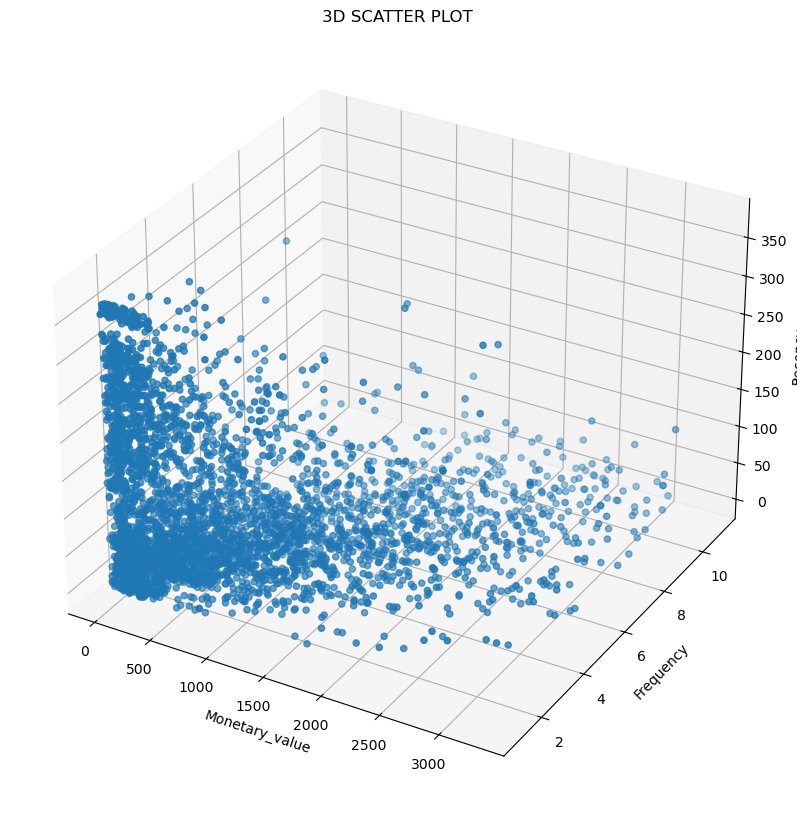

In [90]:
fig=plt.figure(figsize=(10,12))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(non_outliers_df["MonetoryValue"],non_outliers_df["Frequency"],non_outliers_df["Recency"])
ax.set_xlabel('Monetary_value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D SCATTER PLOT')

In [93]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(non_outliers_df[["MonetoryValue","Frequency","Recency"]])
scaled_data_df=pd.DataFrame(scaled_data,index=non_outliers_df.index,columns=["MonetoryValue","Frequency","Recency"])
scaled_data_df

,MonetoryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.27,-0.38,-0.97
2,-0.77,-0.83,-0.24
3,1.64,-0.38,-0.56
4,-0.66,-0.83,-0.89
...,...,...,...
4243,-0.29,1.41,-0.81
4244,-0.53,-0.83,-0.32
4245,-0.58,-0.83,2.02
4246,0.25,-0.38,0.14


Text(0.5, 0.92, '3D SCATTER PLOT')

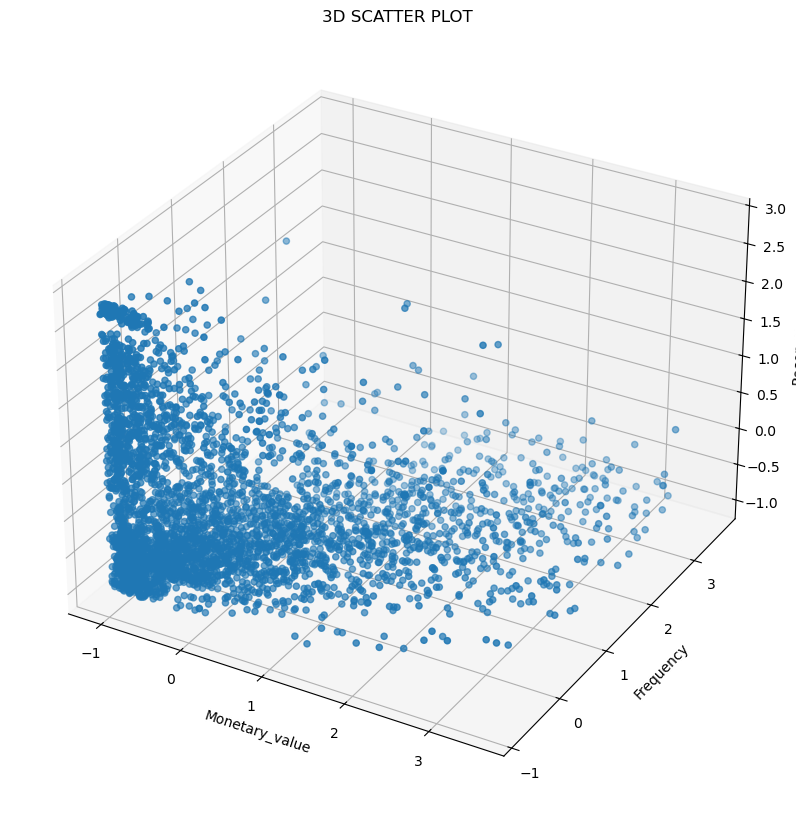

In [94]:
fig=plt.figure(figsize=(10,12))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(scaled_data_df["MonetoryValue"],scaled_data_df["Frequency"],scaled_data_df["Recency"])
ax.set_xlabel('Monetary_value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D SCATTER PLOT')

K-MENAS CLUSTERING

In [ ]:
max_k=12
inertia=[]
k_vlaues=range(2,max_k+1)
